In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

<ipython-input-1-a0030765309d>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# For reading stock data from yahoo
from __future__ import division
from pandas_datareader import DataReader
#import fix_yahoo_finance as yf

# For time stamps
from datetime import datetime

In [3]:
# List of Tech_stocks for analytics
tech_list = ['AAPL','AMZN','FB','GOOG','NFLX','TSLA']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing Yahoo finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)


In [13]:
df=AAPL
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,0.792625,76.809998,0.770250,0.787525,1.459464e+10,78.225410
2020-05-12,0.799225,77.727501,0.794575,0.778525,1.623012e+10,77.331436
2020-05-13,0.789875,75.802498,0.780375,0.769125,2.006224e+10,76.397720
2020-05-14,0.774475,75.382500,0.761275,0.773850,1.589292e+10,76.867065
2020-05-15,0.769750,75.052498,0.750875,0.769275,1.663484e+10,76.412621


In [14]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

                High         Low      Open     Close        Volume   Adj Close
Date                                                                          
2020-05-11  0.007926   76.809998  0.007703  0.007875  1.459464e+12   78.225410
2020-05-12  0.007992   77.727501  0.007946  0.007785  1.623012e+12   77.331436
2020-05-13  0.007899   75.802498  0.007804  0.007691  2.006224e+12   76.397720
2020-05-14  0.007745   75.382500  0.007613  0.007739  1.589292e+12   76.867065
2020-05-15  0.007697   75.052498  0.007509  0.007693  1.663484e+12   76.412621
...              ...         ...       ...       ...           ...         ...
2021-05-03  0.013407  131.830002  0.013204  0.013254  7.513510e+11  132.315247
2021-05-04  0.013149  126.699997  0.013119  0.012785  1.375647e+12  127.633202
2021-05-05  0.013045  127.970001  0.012920  0.012810  8.400090e+11  127.882790
2021-05-06  0.012975  127.129997  0.012789  0.012974  7.812830e+11  129.520004
2021-05-07  0.013126  129.479996  0.013085  0.013021

In [15]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [16]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (200, 3)
y_train (200, 1)
X_test (51, 3)
y_test (51, 1)


# Compiling and training the neural network model

In [17]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 0s 108ms/step - loss: 9795991473487872.0000 - val_loss: 3593431632838656.0000
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 6621458738446336.0000 - val_loss: 628968783872.0000
Epoch 3/10
2/2 [==============================] - 0s 17ms/step - loss: 807118106001408.0000 - val_loss: 1772982498230272.0000
Epoch 4/10
2/2 [==============================] - 0s 23ms/step - loss: 3762920169144320.0000 - val_loss: 298540022628352.0000
Epoch 5/10
2/2 [==============================] - 0s 16ms/step - loss: 472372448591872.0000 - val_loss: 464418303377408.0000
Epoch 6/10
2/2 [==============================] - 0s 20ms/step - loss: 1405113449054208.0000 - val_loss: 784210965037056.0000
Epoch 7/10
2/2 [==============================] - 0s 18ms/step - loss: 1502870125936640.0000 - val_loss: 16628307722240.0000
Epoch 8/10
2/2 [==============================] - 0s 21ms/step - loss: 98566471155712.0000 - val_loss: 349198121697280.00


# Predicted Values

In [18]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[-1573305.5]
 [-1747003. ]
 [-1234732. ]
 [-1085635. ]
 [-1199263. ]
 [-1891320. ]
 [-1632452.5]
 [-1638896.5]
 [-1375076.5]
 [-1188443. ]]


# Calculating the error in the trained Neural Network model

In [19]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 2430362714112.00 MSE (1558962.06 RMSE)
Test Score: 1310483415040.00 MSE (1144763.48 RMSE)


# Predictions vs Real results

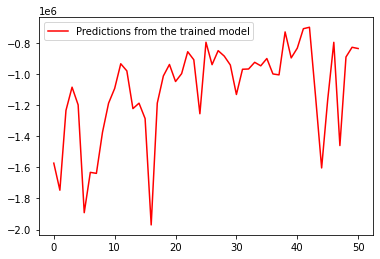

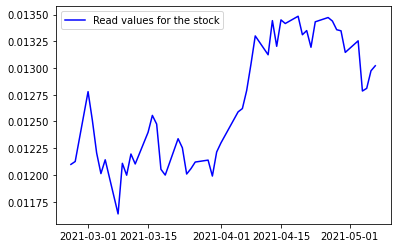

In [20]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

In [21]:
df=AMZN
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,2419.669922,2372.110107,2374.699951,2409.000000,3259200,2409.000000
2020-05-12,2419.000000,2355.000000,2411.850098,2356.949951,3074900,2356.949951
2020-05-13,2407.699951,2337.800049,2366.800049,2367.919922,4782900,2367.919922
2020-05-14,2391.370117,2353.209961,2361.010010,2388.850098,3648100,2388.850098
2020-05-15,2411.000000,2356.370117,2368.520020,2409.780029,4235000,2409.780029


In [22]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

                 High          Low       Open      Close     Volume  \
Date                                                                  
2020-05-11  24.196699  2372.110107  23.747000  24.090000  325920000   
2020-05-12  24.190000  2355.000000  24.118501  23.569500  307490000   
2020-05-13  24.077000  2337.800049  23.668000  23.679199  478290000   
2020-05-14  23.913701  2353.209961  23.610100  23.888501  364810000   
2020-05-15  24.110000  2356.370117  23.685200  24.097800  423500000   
...               ...          ...        ...        ...        ...   
2021-05-03  34.866499  3372.699951  34.847300  33.864900  587550000   
2021-05-04  33.679800  3272.129883  33.561899  33.118701  543940000   
2021-05-05  33.547000  3264.360107  33.388601  32.705400  371130000   
2021-05-06  33.143999  3247.199951  32.700000  33.063701  444770000   
2021-05-07  33.308899  3289.070068  33.190901  32.916101  470680000   

              Adj Close  
Date                     
2020-05-11  2409.000000 

In [23]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [24]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (200, 3)
y_train (200, 1)
X_test (51, 3)
y_test (51, 1)


In [25]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 0s 108ms/step - loss: 6256178176.0000 - val_loss: 83351720.0000
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 198169584.0000 - val_loss: 576882176.0000
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 1437266432.0000 - val_loss: 966850560.0000
Epoch 4/10
2/2 [==============================] - 0s 20ms/step - loss: 1857939584.0000 - val_loss: 492398592.0000
Epoch 5/10
2/2 [==============================] - 0s 18ms/step - loss: 839465792.0000 - val_loss: 56500500.0000
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 80193224.0000 - val_loss: 41079020.0000
Epoch 7/10
2/2 [==============================] - 0s 25ms/step - loss: 154768240.0000 - val_loss: 226385056.0000
Epoch 8/10
2/2 [==============================] - 0s 25ms/step - loss: 501622848.0000 - val_loss: 275146432.0000
Epoch 9/10
2/2 [==============================] - 0s 32ms/step - loss: 534981152.0000 - val_loss

In [26]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[7230.3423]
 [6815.221 ]
 [4352.276 ]
 [4130.444 ]
 [6326.7485]
 [8705.354 ]
 [8585.248 ]
 [6663.725 ]
 [6416.53  ]
 [4798.1626]]


In [27]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 55186616.00 MSE (7428.77 RMSE)
Test Score: 37567132.00 MSE (6129.20 RMSE)


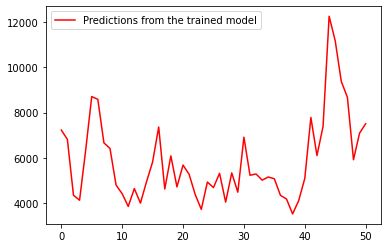

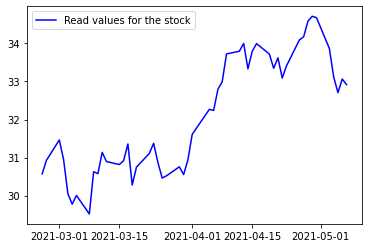

In [28]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

In [29]:
df=FB
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,215.000000,210.369995,210.889999,213.179993,12911900,213.179993
2020-05-12,215.279999,210.000000,213.289993,210.100006,14704600,210.100006
2020-05-13,210.779999,202.110001,209.429993,205.100006,20684600,205.100006
2020-05-14,206.929993,200.690002,202.559998,206.809998,17178900,206.809998
2020-05-15,211.339996,204.119995,205.270004,210.880005,19383200,210.880005


In [30]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

              High         Low    Open   Close      Volume   Adj Close
Date                                                                  
2020-05-11  2.1500  210.369995  2.1089  2.1318  1291190000  213.179993
2020-05-12  2.1528  210.000000  2.1329  2.1010  1470460000  210.100006
2020-05-13  2.1078  202.110001  2.0943  2.0510  2068460000  205.100006
2020-05-14  2.0693  200.690002  2.0256  2.0681  1717890000  206.809998
2020-05-15  2.1134  204.119995  2.0527  2.1088  1938320000  210.880005
...            ...         ...     ...     ...         ...         ...
2021-05-03  3.2855  321.839996  3.2617  3.2258  1871950000  322.579987
2021-05-04  3.2219  313.119995  3.2002  3.1836  2403260000  318.359985
2021-05-05  3.2106  314.489990  3.1819  3.1502  1557760000  315.019989
2021-05-06  3.2024  313.269989  3.1452  3.2002  1901220000  320.019989
2021-05-07  3.2294  318.750000  3.2238  3.1908  1591280000  319.079987

[251 rows x 6 columns]


In [31]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [32]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (200, 3)
y_train (200, 1)
X_test (51, 3)
y_test (51, 1)


In [33]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 0s 108ms/step - loss: 847050637312.0000 - val_loss: 168976760832.0000
Epoch 2/10
2/2 [==============================] - 0s 24ms/step - loss: 319602688000.0000 - val_loss: 59438542848.0000
Epoch 3/10
2/2 [==============================] - 0s 20ms/step - loss: 121844875264.0000 - val_loss: 29822726144.0000
Epoch 4/10
2/2 [==============================] - 0s 21ms/step - loss: 58932244480.0000 - val_loss: 13964752896.0000
Epoch 5/10
2/2 [==============================] - 0s 19ms/step - loss: 27644569600.0000 - val_loss: 5801384960.0000
Epoch 6/10
2/2 [==============================] - 0s 20ms/step - loss: 10962568192.0000 - val_loss: 2337321728.0000
Epoch 7/10
2/2 [==============================] - 0s 23ms/step - loss: 4542238208.0000 - val_loss: 690767040.0000
Epoch 8/10
2/2 [==============================] - 0s 22ms/step - loss: 1258662656.0000 - val_loss: 80690320.0000
Epoch 9/10
2/2 [==============================] - 0s 22ms/step - los

In [34]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[0.01358068]
 [0.01358068]
 [0.01358068]
 [0.01358068]
 [0.01358068]
 [0.01358068]
 [0.01358068]
 [0.01358068]
 [0.01358068]
 [0.01358068]]


In [35]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 6.68 MSE (2.59 RMSE)
Test Score: 8.51 MSE (2.92 RMSE)


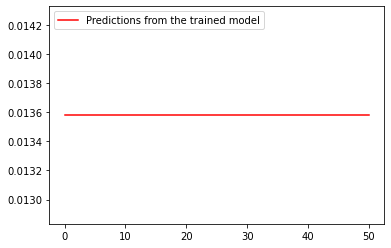

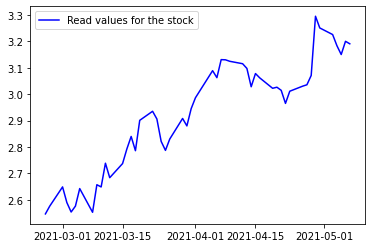

In [37]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

In [38]:
df=GOOG
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,1416.530029,1377.151978,1378.280029,1403.260010,1412100,1403.260010
2020-05-12,1415.000000,1374.770020,1407.119995,1375.739990,1390600,1375.739990
2020-05-13,1385.482056,1328.400024,1377.050049,1349.329956,1812600,1349.329956
2020-05-14,1357.420044,1323.910034,1335.020020,1356.130005,1603100,1356.130005
2020-05-15,1374.479980,1339.000000,1350.000000,1373.189941,1707700,1373.189941


In [39]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

                 High          Low       Open      Close     Volume  \
Date                                                                  
2020-05-11  14.165300  1377.151978  13.782800  14.032600  141210000   
2020-05-12  14.150000  1374.770020  14.071200  13.757400  139060000   
2020-05-13  13.854821  1328.400024  13.770500  13.493300  181260000   
2020-05-14  13.574200  1323.910034  13.350200  13.561300  160310000   
2020-05-15  13.744800  1339.000000  13.500000  13.731899  170770000   
...               ...          ...        ...        ...        ...   
2021-05-03  24.197000  2384.500000  24.027200  23.951699  168940000   
2021-05-04  23.792600  2311.699951  23.697400  23.542500  175600000   
2021-05-05  23.822000  2351.409912  23.684199  23.567400  109030000   
2021-05-06  23.827100  2342.337891  23.506399  23.813501  103090000   
2021-05-07  24.164099  2390.000000  24.000000  23.986899  116360000   

              Adj Close  
Date                     
2020-05-11  1403.260010 

In [40]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [41]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (200, 3)
y_train (200, 1)
X_test (51, 3)
y_test (51, 1)


In [42]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 0s 211ms/step - loss: 367776512.0000 - val_loss: 30884678.0000
Epoch 2/10
2/2 [==============================] - 0s 20ms/step - loss: 120585744.0000 - val_loss: 96328560.0000
Epoch 3/10
2/2 [==============================] - 0s 37ms/step - loss: 182346720.0000 - val_loss: 12219010.0000
Epoch 4/10
2/2 [==============================] - 0s 34ms/step - loss: 19213742.0000 - val_loss: 14860302.0000
Epoch 5/10
2/2 [==============================] - 0s 34ms/step - loss: 49252776.0000 - val_loss: 43342312.0000
Epoch 6/10
2/2 [==============================] - 0s 28ms/step - loss: 90333376.0000 - val_loss: 17093588.0000
Epoch 7/10
2/2 [==============================] - 0s 32ms/step - loss: 28389622.0000 - val_loss: 167754.9688
Epoch 8/10
2/2 [==============================] - 0s 30ms/step - loss: 4302553.5000 - val_loss: 14393883.0000
Epoch 9/10
2/2 [==============================] - 0s 35ms/step - loss: 36224184.0000 - val_loss: 17815606.0000


In [43]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[3095.104 ]
 [3526.937 ]
 [2377.5288]
 [1920.6489]
 [2512.4497]
 [3585.3423]
 [3716.0142]
 [2788.7065]
 [2873.1802]
 [2147.4775]]


In [44]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 9262844.00 MSE (3043.49 RMSE)
Test Score: 6751343.50 MSE (2598.33 RMSE)


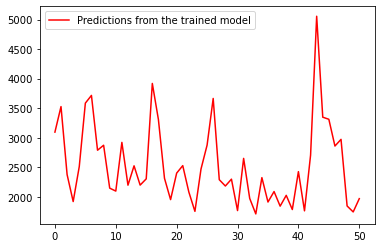

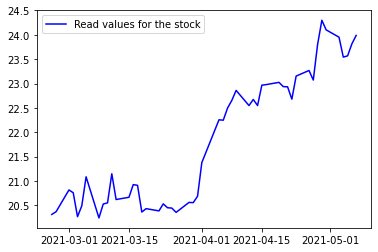

In [45]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

In [46]:
df=NFLX
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,444.890015,435.559998,436.329987,440.519989,5486000,440.519989
2020-05-12,444.170013,431.359985,442.000000,431.820007,4598200,431.820007
2020-05-13,447.000000,427.269989,435.690002,438.269989,7014600,438.269989
2020-05-14,452.380005,432.820007,444.899994,441.950012,9007500,441.950012
2020-05-15,455.000000,437.510010,440.700012,454.190002,7244000,454.190002


In [47]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

              High         Low    Open   Close     Volume   Adj Close
Date                                                                 
2020-05-11  4.4489  435.559998  4.3633  4.4052  548600000  440.519989
2020-05-12  4.4417  431.359985  4.4200  4.3182  459820000  431.820007
2020-05-13  4.4700  427.269989  4.3569  4.3827  701460000  438.269989
2020-05-14  4.5238  432.820007  4.4490  4.4195  900750000  441.950012
2020-05-15  4.5500  437.510010  4.4070  4.5419  724400000  454.190002
...            ...         ...     ...     ...        ...         ...
2021-05-03  5.1895  505.200012  5.1265  5.0911  409190000  509.109985
2021-05-04  5.1163  496.790009  5.1078  5.0318  434950000  503.179993
2021-05-05  5.0778  494.630005  5.0499  4.9608  312940000  496.079987
2021-05-06  4.9955  491.369995  4.9599  4.9955  378370000  499.549988
2021-05-07  5.0855  501.119995  5.0462  5.0384  313110000  503.839996

[251 rows x 6 columns]


In [48]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [49]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (200, 3)
y_train (200, 1)
X_test (51, 3)
y_test (51, 1)


In [50]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 0s 108ms/step - loss: 19713708032.0000 - val_loss: 1061167744.0000
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 5541405696.0000 - val_loss: 280473536.0000
Epoch 3/10
2/2 [==============================] - 0s 22ms/step - loss: 1508672896.0000 - val_loss: 153438512.0000
Epoch 4/10
2/2 [==============================] - 0s 19ms/step - loss: 835153856.0000 - val_loss: 80181424.0000
Epoch 5/10
2/2 [==============================] - 0s 18ms/step - loss: 449705440.0000 - val_loss: 40294592.0000
Epoch 6/10
2/2 [==============================] - 0s 20ms/step - loss: 211191744.0000 - val_loss: 19819382.0000
Epoch 7/10
2/2 [==============================] - 0s 20ms/step - loss: 103101384.0000 - val_loss: 9338845.0000
Epoch 8/10
2/2 [==============================] - 0s 25ms/step - loss: 50206548.0000 - val_loss: 4171228.0000
Epoch 9/10
2/2 [==============================] - 0s 23ms/step - loss: 22528458.0000 - val_loss: 1

In [51]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[1132.3195 ]
 [ 999.91364]
 [ 809.75836]
 [ 809.9713 ]
 [1427.7233 ]
 [1340.5001 ]
 [1349.872  ]
 [1060.1393 ]
 [ 923.87274]
 [1004.1471 ]]


In [52]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 3651229.50 MSE (1910.82 RMSE)
Test Score: 2053826.25 MSE (1433.12 RMSE)


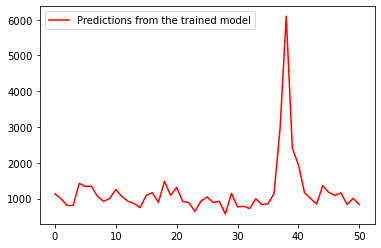

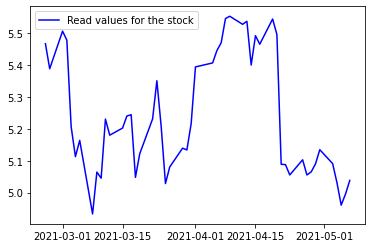

In [53]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()


In [54]:
df=TSLA
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,164.800003,157.000000,158.102005,162.257996,82598000.0,162.257996
2020-05-12,168.658005,161.600006,165.399994,161.882004,79534500.0,161.882004
2020-05-13,165.199997,152.660004,164.166000,158.192001,95327500.0,158.192001
2020-05-14,160.671997,152.800003,156.000000,160.666000,68411000.0,160.666000
2020-05-15,161.009995,157.309998,158.070007,159.834000,52592000.0,159.834000


In [55]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

               High         Low     Open    Close        Volume   Adj Close
Date                                                                       
2020-05-11  1.64800  157.000000  1.58102  1.62258  8.259800e+09  162.257996
2020-05-12  1.68658  161.600006  1.65400  1.61882  7.953450e+09  161.882004
2020-05-13  1.65200  152.660004  1.64166  1.58192  9.532750e+09  158.192001
2020-05-14  1.60672  152.800003  1.56000  1.60666  6.841100e+09  160.666000
2020-05-15  1.61010  157.309998  1.58070  1.59834  5.259200e+09  159.834000
...             ...         ...      ...      ...           ...         ...
2021-05-03  7.06000  680.500000  7.03800  6.84900  2.704310e+09  684.900024
2021-05-04  6.83450  657.700012  6.78940  6.73600  2.973930e+09  673.599976
2021-05-05  6.85300  667.340027  6.81060  6.70940  2.190190e+09  670.940002
2021-05-06  6.81020  650.000000  6.80760  6.63540  2.778460e+09  663.539978
2021-05-07  6.90000  660.219971  6.65800  6.72370  2.342210e+09  672.369995

[251 rows x

In [56]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [57]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (200, 3)
y_train (200, 1)
X_test (51, 3)
y_test (51, 1)


In [58]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
2/2 [==============================] - 0s 109ms/step - loss: 1772371705856.0000 - val_loss: 177302847488.0000
Epoch 2/10
2/2 [==============================] - 0s 21ms/step - loss: 564912324608.0000 - val_loss: 23032698880.0000
Epoch 3/10
2/2 [==============================] - 0s 25ms/step - loss: 61618085888.0000 - val_loss: 2981242368.0000
Epoch 4/10
2/2 [==============================] - 0s 23ms/step - loss: 27367413760.0000 - val_loss: 25411031040.0000
Epoch 5/10
2/2 [==============================] - 0s 23ms/step - loss: 104415838208.0000 - val_loss: 37599830016.0000
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 144921264128.0000 - val_loss: 38322733056.0000
Epoch 7/10
2/2 [==============================] - 0s 33ms/step - loss: 141246971904.0000 - val_loss: 30733762560.0000
Epoch 8/10
2/2 [==============================] - 0s 29ms/step - loss: 109642326016.0000 - val_loss: 20750946304.0000
Epoch 9/10
2/2 [==============================] - 0s 29m

In [59]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[ 84699.19 ]
 [ 89181.82 ]
 [ 58897.598]
 [ 51509.418]
 [ 65564.77 ]
 [143074.56 ]
 [194030.08 ]
 [112400.805]
 [146555.56 ]
 [131541.28 ]]


In [60]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 19323768832.00 MSE (139009.96 RMSE)
Test Score: 6818958336.00 MSE (82576.98 RMSE)


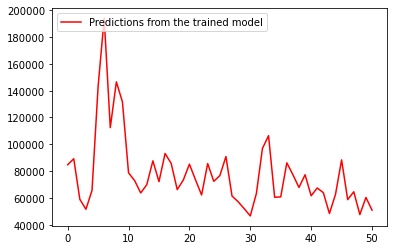

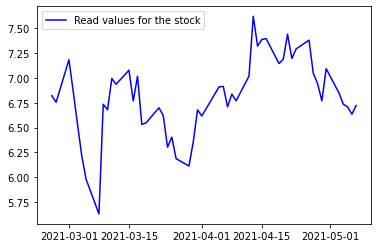

In [61]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()